# Sprawozdanie 12

imports

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

### Zadanie 1 - Próbki prędkości i przebyta droga

In [7]:
def trapezoid(vec_V, vec_S):
    integral_list = [0]
    integral = 0
    vec_V_change = list(map(lambda x: x / 3.6, vec_V))

    for i in range(0, len(vec_S) - 1):
        val = (vec_V_change[i] + vec_V_change[i+1]) * (vec_S[i+1] - vec_S[i])/2
        integral += val
        integral_list.append(val)
    
    plt.plot(vec_S, list(map(lambda x: x / 1000, integral_list)))
    plt.xlabel('time [s]')
    plt.ylabel('distance [km]')
    return integral / 1000

1.7166666666666666

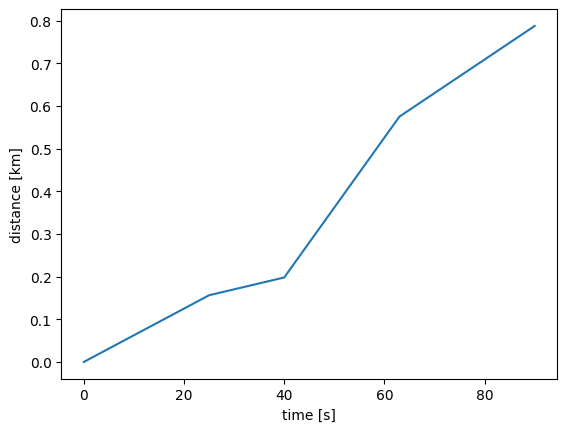

In [8]:
V = [10,35,60,120,90] # km/h
t = [0, 25, 40, 63, 90] # seconds
trapezoid(V, t)

### Zadanie 2 Złożona kwadratura Simpsona

In [9]:
def simpson(x, y):
    n = len(x)
    h = (x[-1] - x[0]) / n

    integral = y[0]

    for i in range(0, n//2):
        integral += 4 * y[2 * i]

    for i in range(0, n//2 + 1):
        integral += 2 * y[2 * i - 1]

    integral += y[-1]
    integral *= h / 3
    
    return integral

In [10]:
f1 = lambda x: np.exp(-(x**2)) * np.log(x)**2
f2 = lambda x: 1 / (x**3 -2*x -5)
f3 = lambda x: x**5 * np.exp(-x) * np.sin(x)
f4 = lambda x, y: 1 / (np.sqrt(x+y) * (1+x+y)) # 0 <= x <= 1, 0 <= y <= 1 - x
f5 = lambda x, y: x**2 + y**2 # # -3 <= x <= 3, -5 <= y <= 5

Tests

In [25]:
x_val = np.arange(1, 200, 0.1)
y_val_f1 = [f1(x) for x in x_val]
y_val_f2 = [f2(x) for x in x_val]
y_val_f3 = [f3(x) for x in x_val]

print("f1(x) | mine: {} library: {}".format(simpson(x_val, y_val_f1), integrate.simpson(y_val_f1, x_val)))
print("f2(x) | mine: {} library: {}".format(simpson(x_val, y_val_f2), integrate.simpson(y_val_f2, x_val)))
print("f3(x) | mine: {} library: {}".format(simpson(x_val, y_val_f3), integrate.simpson(y_val_f3, x_val)))

f1(x) | mine: 0.014452435710194288 library: 0.014486783890175816
f2(x) | mine: 1.002933423283103 library: 1.5708619013451297
f3(x) | mine: -15.016553472655673 library: -15.052464924398034


### Zadanie 3 - Oznaczone całki podwójne